## Q1: SQL 

* Answer: **2.37**

~~~ 
SELECT
     (COUNT(DISTINCT CASE
        WHEN t_q.attr = 'post' THEN t_q.transaction_id
        ELSE NULL
    END) - COUNT(DISTINCT CASE
        WHEN t_q.attr = 'pre' THEN t_q.transaction_id
        ELSE NULL
    END)) * 1.0 / count (distinct user_id) AS post_pre_diff_avg
    
FROM (SELECT
    t_txns.user_id,
    t_users.country,
    t_users.u_age,
    transaction_id,
    txn_time,
    notif_date,
    DATE_PART('day', txn_time - notif_date) AS days_diff,
    CASE
        WHEN DATE_PART('day', txn_time - notif_date) BETWEEN -7 AND -1 AND
            DATE_PART('epoch', txn_time - notif_date) < 0 THEN 'pre'
        WHEN DATE_PART('day', txn_time - notif_date) BETWEEN 1 AND 7 AND
            DATE_PART('epoch', txn_time - notif_date) > 0 THEN 'post'
        WHEN DATE_PART('day', txn_time - notif_date) = 0 AND
            DATE_PART('epoch', txn_time - notif_date) < 0 THEN 'pre'
        WHEN DATE_PART('day', txn_time - notif_date) = 0 AND
            DATE_PART('epoch', txn_time - notif_date) > 0 THEN 'post'
        ELSE 'NA'
    END AS attr
FROM (SELECT
    user_id,
    transaction_id,
    created_date AS txn_time
FROM transactions
WHERE transactions_state = 'COMPLETED') AS t_txns
INNER JOIN (SELECT
    user_id,
    created_date AS notif_date
FROM notifications
WHERE status = 'SENT') t_notifs
    ON t_txns.user_id = t_notifs.user_id
LEFT JOIN (SELECT
    user_id,
    country,
    2020 - birth_year AS u_age
FROM users) AS t_users
    ON t_txns.user_id = t_users.user_id) t_q
WHERE t_q.attr IN ('pre', 'post') 

~~~


## By country
~~~
-- BY Country
-- BY Country
SELECT
  t_q.country,
  (COUNT(DISTINCT CASE
    WHEN t_q.attr = 'post' THEN t_q.transaction_id
    ELSE NULL
  END) - COUNT(DISTINCT CASE
    WHEN t_q.attr = 'pre' THEN t_q.transaction_id
    ELSE NULL
  END)) * 1.0 / count(DISTINCT user_id) AS post_pre_diff_age_avg
FROM (SELECT
  t_txns.user_id,
  t_users.country,
  t_users.u_age,
  transaction_id,
  txn_time,
  notif_date,
  DATE_PART('day', txn_time - notif_date) AS days_diff,
  CASE
    WHEN DATE_PART('day', txn_time - notif_date) BETWEEN -7 AND -1 AND
      DATE_PART('epoch', txn_time - notif_date) < 0 THEN 'pre'
    WHEN DATE_PART('day', txn_time - notif_date) BETWEEN 1 AND 7 AND
      DATE_PART('epoch', txn_time - notif_date) > 0 THEN 'post'
    WHEN DATE_PART('day', txn_time - notif_date) = 0 AND
      DATE_PART('epoch', txn_time - notif_date) < 0 THEN 'pre'
    WHEN DATE_PART('day', txn_time - notif_date) = 0 AND
      DATE_PART('epoch', txn_time - notif_date) > 0 THEN 'post'
    ELSE 'NA'
  END AS attr
FROM (SELECT
  user_id,
  transaction_id,
  created_date AS txn_time
FROM transactions
WHERE transactions_state = 'COMPLETED') AS t_txns
INNER JOIN (SELECT
  user_id,
  created_date AS notif_date
FROM notifications
WHERE status = 'SENT') t_notifs
  ON t_txns.user_id = t_notifs.user_id
LEFT JOIN (SELECT
  user_id,
  country,
  2020 - birth_year AS u_age
FROM users) AS t_users
  ON t_txns.user_id = t_users.user_id) t_q
WHERE t_q.attr IN ('pre', 'post')
GROUP BY t_q.country

~~~

<img style="float: right;" src="by_country_1.png">

## By age
~~~
-- By age
SELECT
    t_q.u_age,
    (COUNT(DISTINCT CASE
        WHEN t_q.attr = 'post' THEN t_q.transaction_id
        ELSE NULL
    END) - COUNT(DISTINCT CASE
        WHEN t_q.attr = 'pre' THEN t_q.transaction_id
        ELSE NULL
    END)) *1.0 / count (distinct user_id) AS post_pre_diff_age_avg
FROM (SELECT
    t_txns.user_id,
    t_users.country,
    t_users.u_age,
    transaction_id,
    txn_time,
    notif_date,
    DATE_PART('day', txn_time - notif_date) AS days_diff,
    CASE
        WHEN DATE_PART('day', txn_time - notif_date) BETWEEN -7 AND -1 AND
            DATE_PART('epoch', txn_time - notif_date) < 0 THEN 'pre'
        WHEN DATE_PART('day', txn_time - notif_date) BETWEEN 1 AND 7 AND
            DATE_PART('epoch', txn_time - notif_date) > 0 THEN 'post'
        WHEN DATE_PART('day', txn_time - notif_date) = 0 AND
            DATE_PART('epoch', txn_time - notif_date) < 0 THEN 'pre'
        WHEN DATE_PART('day', txn_time - notif_date) = 0 AND
            DATE_PART('epoch', txn_time - notif_date) > 0 THEN 'post'
        ELSE 'NA'
    END AS attr
FROM (SELECT
    user_id,
    transaction_id,
    created_date AS txn_time
FROM transactions
WHERE transactions_state = 'COMPLETED') AS t_txns
INNER JOIN (SELECT
    user_id,
    created_date AS notif_date
FROM notifications
WHERE status = 'SENT') t_notifs
    ON t_txns.user_id = t_notifs.user_id
LEFT JOIN (SELECT
    user_id,
    country,
    2020 - birth_year AS u_age
FROM users) AS t_users
    ON t_txns.user_id = t_users.user_id) t_q
WHERE t_q.attr IN ('pre', 'post')
GROUP BY t_q.u_age

~~~

<img style="float: right;" src="by_age_1.png">

In [1]:
## Imports
import pandas as pd
import numpy as np

In [2]:
# TODAY is golbal dataframe set to last transaction day in rev-txns table
TODAY = pd.to_datetime("2019-05-17") 

df_devices = pd.read_csv("data/rev-devices.csv")

In [3]:
# Reading rev-notification and adjusting column names to avoid confusion
df_notifs = pd.read_csv("data/rev-notifications.csv")
df_notifs["notif_date"] = df_notifs["created_date"] 
df_notifs = df_notifs.drop("created_date", axis = 1)


In [4]:
# Reading rev-notification and adjusting column names to avoid confusion
df_users = pd.read_csv("data/rev-users.csv")
df_users["install_date"] = df_users["created_date"] 
df_users = df_users.drop("created_date", axis = 1)

In [5]:
# Reading rev-notification and adjusting column names to avoid confusion
df_txns = pd.read_csv("data/rev-transactions.csv")
df_txns["txn_date"] = df_txns["created_date"] 
df_txns = df_txns.drop("created_date", axis = 1)


## Plot value counts and txn-histograms

In [6]:
df_notifs["reason"].value_counts()

REENGAGEMENT_ACTIVE_FUNDS               35844
FIFTH_PAYMENT_PROMO                     23743
NO_INITIAL_CARD_USE                     11221
NO_INITIAL_CARD_ORDER                   11136
METAL_GAME_START                         8373
LOST_CARD_ORDER                          6146
NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER     5459
JOINING_ANNIVERSARY                      4158
MADE_MONEY_REQUEST_NOT_SPLIT_BILL        3506
ONBOARDING_TIPS_ACTIVATED_USERS          3145
ENGAGEMENT_SPLIT_BILL_RESTAURANT         2298
BLACK_FRIDAY                             2109
METAL_RESERVE_PLAN                       1233
PREMIUM_ENGAGEMENT_INACTIVE_CARD         1124
WELCOME_HOME                              950
PUMPKIN_PAYMENT_NOTIFICATION              690
PREMIUM_ENGAGEMENT_FEES_SAVED             678
Name: reason, dtype: int64

In [7]:
df_notifs["channel"].value_counts()

EMAIL    61253
PUSH     57683
SMS       2877
Name: channel, dtype: int64

In [8]:
df_notifs["status"].value_counts()

SENT      89477
FAILED    32336
Name: status, dtype: int64

In [9]:
df_txns["transactions_state"].value_counts()

COMPLETED    2407968
DECLINED      155286
REVERTED      112618
FAILED         41053
PENDING        21492
CANCELLED       1658
Name: transactions_state, dtype: int64

In [10]:
## Utility functions
def leftJoin(lDf, rDf, onCol):
    ret = pd.merge(lDf, rDf, how = "left", left_on= onCol, right_on=onCol, suffixes = ("_lDf", "_rDF"))
    return ret

def innerJoin(lDf, rDf, onCol):
    ret = pd.merge(lDf, rDf, how = "inner", left_on= onCol, right_on=onCol, suffixes = ("_lDf", "_rDF"))
    return ret

def castInt(df, intFeatures):
    df[intFeatures] = df[intFeatures].fillna(method='ffill')
    return df

def leCategoricalFeature(df, feature):
    le = preprocessing.LabelEncoder()
    df[feature] = df[feature].astype('str')
    le.fit(df[feature])
    np.save(os.path.join(DPATH, "models", feature + '_classes.npy'), le.classes_)
    df[feature + "_encoded"] = le.transform(df[feature])
    return df

def catToLeSaved(df, catFeatures):
    for feature in catFeatures:
        df = leCategoricalFeatureSaved(df, feature)
    return df

def leCategoricalFeatureSaved(df, feature):
    global classes
    le = preprocessing.LabelEncoder()
    le.classes_ = np.load(os.path.join(DPATH, "models", feature + '_classes.npy'))
    classes = le.classes_

    df[feature] = df[feature].astype('str')
    ddata = dd.from_pandas(df[[feature]], npartitions=30)
    res = ddata.map_partitions(lambda df: df.apply((lambda row: fillNA(*row)), axis=1)).compute(get=get)  
    
    df[feature] = res#.astype('str')
    print("LE Imputing.. ", feature)
    df[str(feature) + "_encoded"] = le.transform(res)
    return df

def sorted_notif_time(group):
    ret = list(group["notif_date"].sort_values())
    if len(ret) == 0:
        return []
    #print(ret)
    return ret

def sorted_txn_time(group):
    ret = list(group["txn_date"].sort_values())
    if len(ret) == 0:
        return []
    #print(ret)
    return ret

def collect_ls(row, col_names):
    ret = {}
    for col_name in col_names:
        ret[col_name] = list(row[col_name])
    return pd.Series(ret)

In [11]:
# Creating final dataset
df_notifs_grp_collect = df_notifs.groupby("user_id")[['notif_date', "channel", "reason", "status"]].apply(collect_ls, col_names = ['notif_date', "channel", "reason", "status"]).reset_index()
df_final = leftJoin(df_users, df_notifs_grp_collect[["user_id",'notif_date', "channel", "reason", "status"]], onCol = "user_id")

df_user_txns = df_txns.groupby("user_id")['txn_date'].apply(list).reset_index()
df_final = leftJoin(df_final, df_user_txns[["user_id", "txn_date"]], onCol = "user_id")

In [12]:
df_final.head()

,user_id,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,install_date,notif_date,channel,reason,status,txn_date
0,user_0,1989,PL,Gdansk,1,STANDARD,1.0,1.0,3,0,0,2018-01-13 05:15:15.599466,"[2018-10-31 22:49:57.304466, 2019-02-13 00:00:...","[PUSH, PUSH, PUSH, EMAIL, PUSH, PUSH, PUSH, EM...","[REENGAGEMENT_ACTIVE_FUNDS, REENGAGEMENT_ACTIV...","[SENT, SENT, SENT, SENT, SENT, SENT, SENT, SENT]","[2018-06-19 01:36:43.065466, 2018-06-25 03:51:..."
1,user_1,1975,GB,London,0,STANDARD,NaN,NaN,21,0,0,2018-01-29 03:38:46.676876,"[2018-11-19 23:50:33.919876, 2019-01-28 21:07:...","[PUSH, PUSH, EMAIL, PUSH, EMAIL, EMAIL, EMAIL]","[REENGAGEMENT_ACTIVE_FUNDS, JOINING_ANNIVERSAR...","[FAILED, FAILED, FAILED, FAILED, SENT, SENT, F...","[2018-04-09 11:06:30.835876, 2018-04-12 12:22:..."
2,user_2,1987,PL,Poznań,0,STANDARD,0.0,0.0,21,0,0,2018-01-18 19:17:31.229096,"[2018-11-07 04:38:24.690096, 2018-11-24 04:38:...","[PUSH, PUSH, EMAIL, PUSH, EMAIL, PUSH, EMAIL, ...","[REENGAGEMENT_ACTIVE_FUNDS, REENGAGEMENT_ACTIV...","[FAILED, FAILED, FAILED, FAILED, FAILED, FAILE...","[2018-08-19 12:13:28.084096, 2018-06-16 13:05:..."
3,user_3,1994,FR,Paris,0,STANDARD,1.0,0.0,0,0,0,2018-01-15 18:47:56.723104,"[2018-11-07 10:30:28.491104, 2018-10-01 17:22:...","[PUSH, PUSH, PUSH, PUSH, PUSH, PUSH, EMAIL, PUSH]","[REENGAGEMENT_ACTIVE_FUNDS, REENGAGEMENT_ACTIV...","[FAILED, FAILED, FAILED, FAILED, FAILED, FAILE...","[2018-03-10 12:35:48.464104, 2018-02-26 11:46:..."
4,user_4,1985,GB,Beckenham,0,STANDARD,NaN,NaN,2,0,0,2018-01-11 00:36:46.673673,"[2018-10-06 06:40:20.931673, 2018-08-23 22:41:...","[PUSH, PUSH, PUSH, PUSH]","[REENGAGEMENT_ACTIVE_FUNDS, REENGAGEMENT_ACTIV...","[FAILED, FAILED, FAILED, FAILED]","[2018-02-17 16:31:57.921673, 2018-02-14 13:35:..."


In [13]:
# Engagement Index = (Last event - First event) / (today - first event)
def row_txn_time(row, today):
    last_txn_time = pd.Series(row).max()
    first_txn_time = pd.Series(row).min()
    engagement_index =  pd.Timedelta(pd.to_datetime(last_txn_time) - pd.to_datetime(first_txn_time)).days / pd.Timedelta( today - pd.to_datetime(first_txn_time)).days
    if engagement_index >= 0.5:
        return 1
    else:
        return 0

In [14]:
count = 0
for index, row in df_final.iterrows():
    if row_txn_time(row["txn_date"], TODAY) ==1:
        count = count+1

In [26]:
print("Percentage(%) active customers as of today: ", round(count*100/df_final.shape[0], 2) )

Percentage(%) active customers as of today:  18.25


# Q2: Engaged vs Unengaged target metric
## User engagement index

### Definition 1 : using today, first and last transaction
* Reference: https://content.iospress.com/articles/data-science/ds1900
* Engagement Index = (Last event - First event) / (today - first event) 
* If index >0.5 means customer has unengaged

https://www.keplercannon.com/customer-engagement-index/

### Definition 2 : using frequency of transactions over weekly and monthly periodicity
[TBD] V2


In [16]:
def monthOfYear(row):
    return str(pd.to_datetime(row).year) + "_" + str(pd.to_datetime(row).month)

def weekOfYear(row):
    return str(pd.to_datetime(row).year) + "_" + str(pd.to_datetime(row).weekofyear)

def get_txn_features(row):
    global TODAY
    f_name = "txn_date"
    txn_times_Series = pd.Series(row[f_name]).sort_values().reset_index(drop=True)
    temps = pd.DataFrame(txn_times_Series)
    num_lags = 2
    dataframe = pd.concat([temps.shift(1 - i) for i in range(num_lags)], axis=1)
    dataframe.columns = [f_name + "_t-" + str(num_lags - i-1) for i in range(num_lags)]
    
    dataframe["days_diff"] = (pd.to_datetime(dataframe[f_name + "_t-0"]) - pd.to_datetime(dataframe[f_name + "_t-1"]))/ np.timedelta64(1, 's')
    ret = getDaysDiffFeatures(dataframe["days_diff"])
    ret ["fet_today"] = (pd.to_datetime(TODAY) - pd.to_datetime(temps.max()))/ np.timedelta64(1, 's') 
    return pd.Series(ret)
    
def getDaysDiffFeatures(daysDiff_ser):
    daysDiff_ser = daysDiff_ser[1:].reset_index(drop = True)
    mean = daysDiff_ser.mean()
    median = daysDiff_ser.median()
    q25, q75 = daysDiff_ser.quantile(0.25), daysDiff_ser.quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    iqr_lower, iqr_upper = q25 - cut_off, q75 + cut_off

    # calculate summary statistics
    data_mean, data_std = mean, daysDiff_ser.std()
    # identify outliers
    cut_off = data_std * 3
    std_lower, std_upper = data_mean - cut_off, data_mean + cut_off
    ret = {"fet_q25": q25, "fet_q75": q25, "fet_iqrLow": iqr_lower, "fet_iqrUpper": iqr_upper, "fet_mean": data_mean,
          "fet_std": data_std, "fet_median": median, "fet_stdLow": std_lower, "fet_stdUpper": std_upper }
    
    return ret

## Feature engineering

In [17]:
modelFeatures =["fet_q25", "fet_q75", "fet_iqrLow", "fet_iqrUpper", "fet_mean","fet_std", "fet_median", "fet_stdLow", "fet_stdUpper", "fet_today" ]

In [18]:
df_final_features = df_final.apply(get_txn_features , axis = 1)
df_final = df_final.merge(df_final_features , left_index=True, right_index=True)
df_final["y_label"] = df_final["txn_date"].apply(row_txn_time, today = TODAY)

In [19]:
df_final[modelFeatures].head(10)

,fet_q25,fet_q75,fet_iqrLow,fet_iqrUpper,fet_mean,fet_std,fet_median,fet_stdLow,fet_stdUpper,fet_today
0,118.32200,118.32200,-88927.147000,1.485274e+05,1.046992e+05,3.137087e+05,3895.8785,-8.364269e+05,1.045825e+06,0 1.282875e+06 dtype: float64
1,260.58050,260.58050,-115416.006625,1.930549e+05,2.642866e+05,6.445952e+05,6635.4795,-1.669499e+06,2.198072e+06,0 6.832471e+06 dtype: float64
2,58.40600,58.40600,-425825.262250,7.098645e+05,4.241920e+05,1.287031e+06,8917.8110,-3.436900e+06,4.285284e+06,0 1.449767e+06 dtype: float64
3,8028.28950,8028.28950,-94440.089250,1.788089e+05,1.359263e+05,6.103088e+05,28131.7700,-1.695000e+06,1.966853e+06,0 5.712057e+06 dtype: float64
4,2689.84800,2689.84800,-200166.028500,3.407830e+05,6.914820e+05,2.603664e+06,41557.4965,-7.119510e+06,8.502474e+06,0 1.061153e+07 dtype: float64
5,65.75225,65.75225,-339900.430375,5.666761e+05,8.417643e+05,2.214911e+06,16290.9140,-5.802969e+06,7.486497e+06,0 815681.168196 dtype: float64
6,9.72800,9.72800,9.728000,9.728000e+00,9.728000e+00,NaN,9.7280,NaN,NaN,0 1.392579e+07 dtype: float64
7,399.48750,399.48750,-116573.081625,1.953538e+05,5.188411e+06,1.265208e+07,8357.8530,-3.276783e+07,4.314465e+07,0 1.113105e+07 dtype: float64
8,508.18575,508.18575,-578801.264625,9.660239e+05,5.704642e+05,1.438646e+06,83949.3575,-3.745473e+06,4.886401e+06,0 1.438193e+07 dtype: float64
9,16258.63025,16258.63025,-882213.817000,1.513713e+06,5.256926e+05,8.756588e+05,95694.2195,-2.101284e+06,3.152669e+06,0 1.328616e+06 dtype: float64


In [20]:
# Iterate over each row value to identify for each successful PN, user was unengaged before but engaged later
# global PN reason and status effectiveness [TODO: get time effectiveness too]
# local ordered PN reason and status effectiveness.


In [21]:
def engagedBefore(txnSeries, today):
    txns_beforePN = txnSeries[txnSeries < today]
    last_txn_time = txns_beforePN.max()
    first_txn_time = txns_beforePN.min()
    if pd.Timedelta( today - pd.to_datetime(first_txn_time)).days == 0:
        return 0
    engagement_index = pd.Timedelta(pd.to_datetime(last_txn_time) - pd.to_datetime(first_txn_time)).days / pd.Timedelta( today - pd.to_datetime(first_txn_time)).days
    return engagement_index >= 0.5

def engagedAfter(txnSeries, today):
    # Add 7 days to today and check for engagement index
    today_7 = today + pd.Timedelta(days = 7)
    
    txns_beforePN = txnSeries[txnSeries < today_7]
    last_txn_time = txns_beforePN.max()
    first_txn_time = txns_beforePN.min()
    if pd.Timedelta( today_7 - pd.to_datetime(first_txn_time)).days == 0:
        return 0
    engagement_index = pd.Timedelta(pd.to_datetime(last_txn_time) - pd.to_datetime(first_txn_time)).days / pd.Timedelta( today_7 - pd.to_datetime(first_txn_time)).days
    
    #return sum((txnSeries > today) &  (txnSeries < today_7)) > 0
    return engagement_index >= 0.5

def checkPNsuccess(row, txnSeries):
    today = pd.to_datetime(row["notif_date"])
    status = row["status"]
    reason = row["reason"]
    channel = row["channel"]
    
    if not engagedBefore(txnSeries, today) and engagedAfter(txnSeries, today) and status == "SENT":
        return "SUCCESS"
    else:
        return "FAIL"

def get_notif_status(row):
    f_name = ["notif_date", "channel", "status", "reason"]
    try:
        notif_cdf = pd.DataFrame({"notif_date": row["notif_date"], "channel": row["channel"], "status": row["status"], "reason": row["reason"]})
    except:
        return 0 
    
    notif_cdf = notif_cdf.sort_values(by = "notif_date").reset_index(drop=True)
    txn_times_Series = pd.to_datetime(pd.Series(row["txn_date"]).sort_values().reset_index(drop = True))
    notif_cdf["engagementStatus"] = notif_cdf.apply(checkPNsuccess, txnSeries = txn_times_Series, axis = 1)
    return sum(notif_cdf["engagementStatus"] == "SUCCESS") 
    #return notif_cdf

In [22]:
count = 0
for index, row in df_final.iterrows():
    if get_notif_status(row) > 0:
        count = count+1

In [23]:
print(count*100/df_final.shape[0] )

18.25012866700978


## Data cleanup

In [29]:
import matplotlib.pyplot as pyplot
import seaborn as sns
def plotCategoricalCount(feature, labels, y_legend, x_legend):
    pyplot.figure(figsize=(15,7))
    sns.set(style="darkgrid")
    ax = sns.countplot(feature)#,order=labels)
    #plt.ylabel( fontsize=16)
    ax.set_xticklabels(labels, rotation='vertical', fontsize=5)
    ax.set_xlabel(x_legend,fontsize=20)
    
    ax.tick_params(labelsize=20)
    ax.set_ylabel(y_legend,fontsize=20)
    
    for hist in ax.patches:
        height = hist.get_height()
        ax.text(hist.get_x()+hist.get_width()/2.,
                height + 20,
                '{:.2f}%'.format(100*height/len(feature)),
                ha="center", fontsize=15)

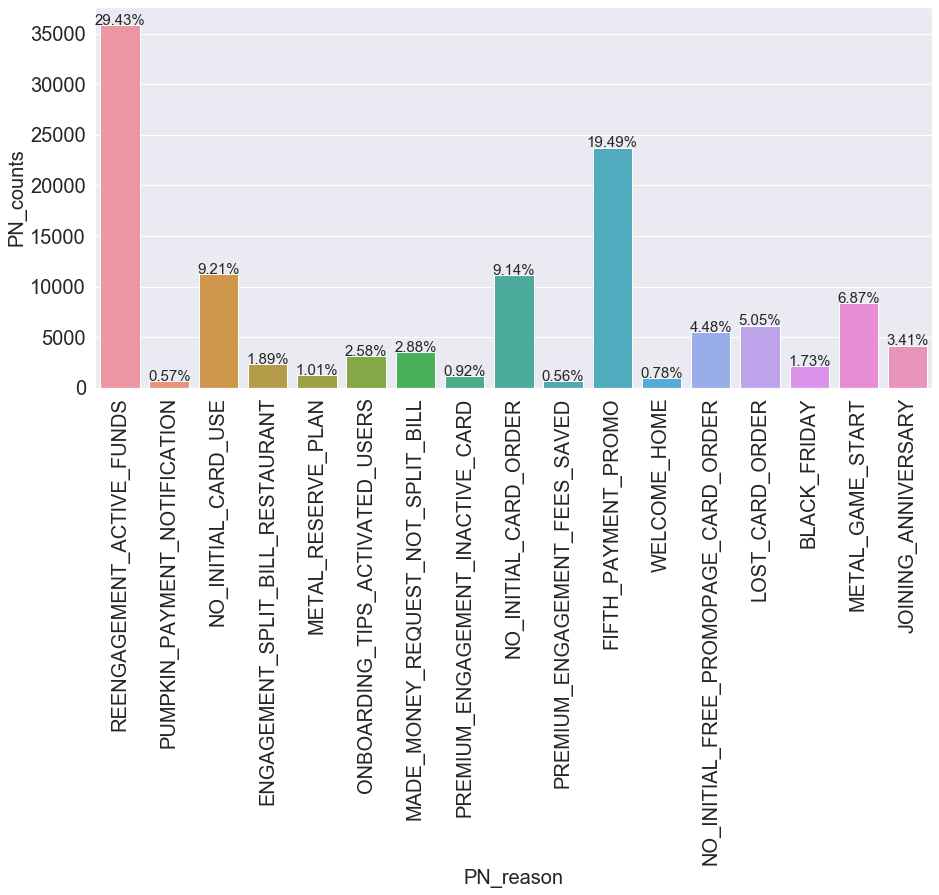

In [30]:
plotCategoricalCount(df_notifs["reason"], df_notifs["reason"].unique(), "PN_counts" ,"PN_reason")

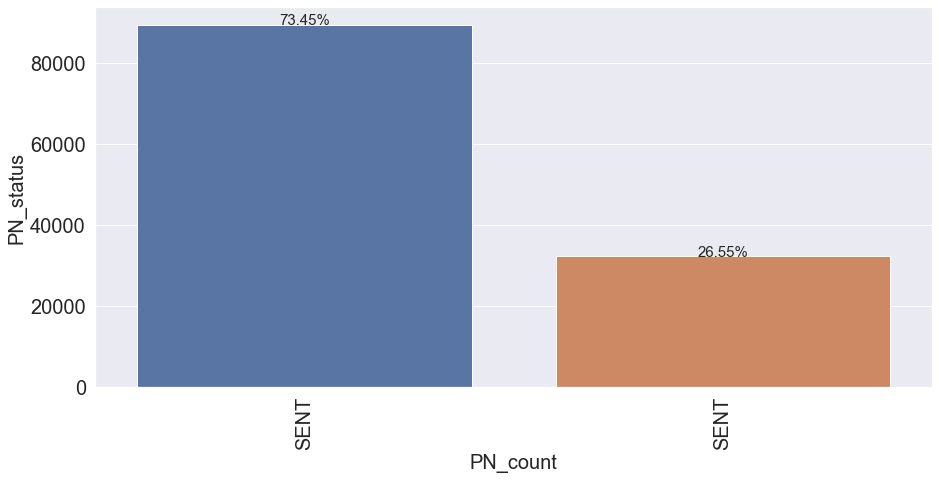

In [31]:
plotCategoricalCount(df_notifs["status"], df_notifs["status"], "PN_status", "PN_count")

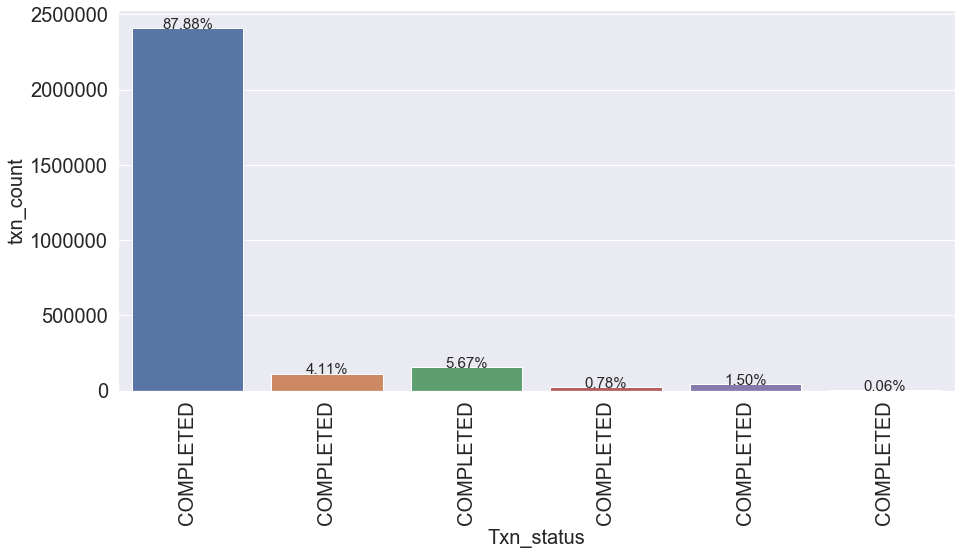

In [32]:
plotCategoricalCount(df_txns["transactions_state"], df_txns["transactions_state"], "txn_count", "Txn_status")

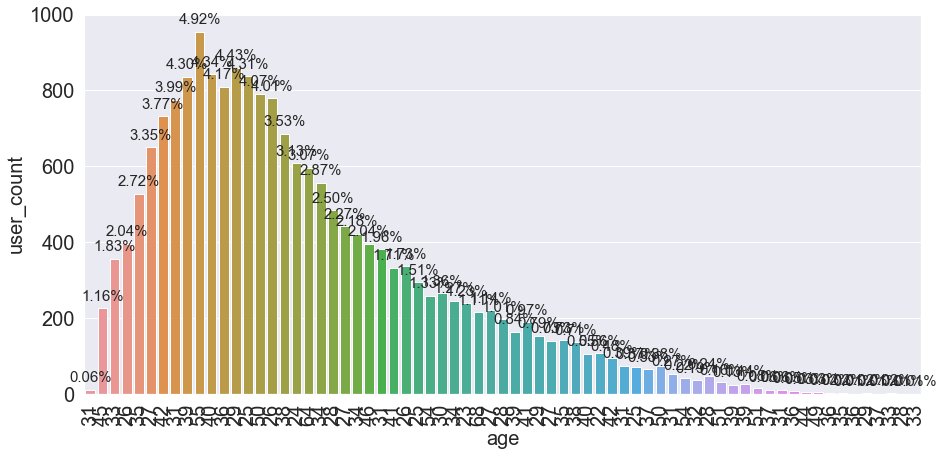

In [33]:
plotCategoricalCount(2020 - df_users["birth_year"], 2020 - df_users["birth_year"], "user_count", "age")

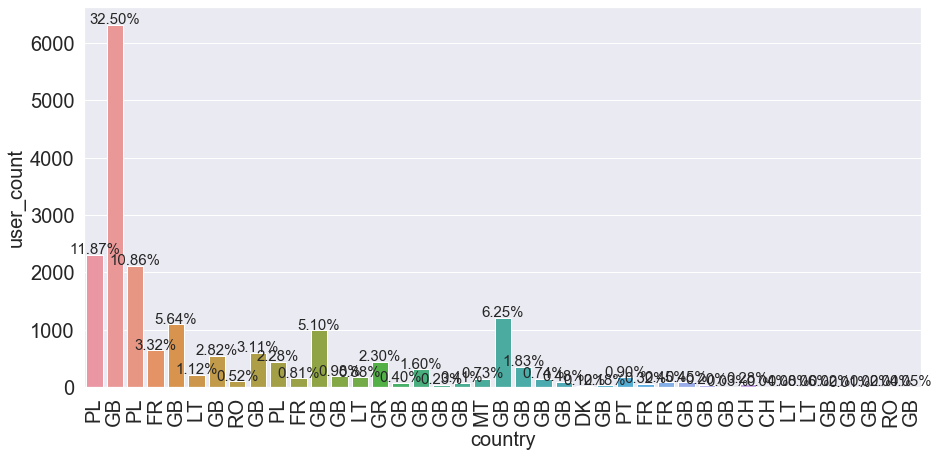

In [34]:
plotCategoricalCount(df_users["country"], df_users["country"], "user_count", "country")

## Model Training
# Feature transformation and selection

In [35]:
from sklearn.preprocessing import RobustScaler
# Scaling features, scaling test features with same scalar
def scaleTrainTestData(X_train, X_test, modelFeatures):
    scaler = RobustScaler(quantile_range=(10, 80))
    scaler.fit(castInt(X_train, modelFeatures))
    X_train_scaled = scaler.transform(castInt(X_train, modelFeatures))
    X_test_scaled = scaler.transform(castInt(X_test, modelFeatures))
    return X_train_scaled, X_test_scaled

In [37]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

# Training and tuning classification model using GridSearchCV
def trainLGBM(X_train, y_train, old_model = None):
    
    # [todo] pred_30_le, pred_30_real, both dict
    
    print("Training start: ", X_train.shape, y_train.shape)#, X_test.shape, y_test.shape)
    #------------------------Build LightGBM Model-----------------------
    train_data=lgb.Dataset(X_train, label=y_train)

    #print("SPW: ", sum(y_train == 0)/sum(y_train == 0))
    spw = sum(y_train == 1)/(sum(y_train == 0) +1)
    
    
    #Select Hyper-Parameters
    params = {'boosting_type': 'gbdt',
              'n_estimators': 500,
          'max_depth' : -1, # -1
          'objective': 'binary',
          'nthread':-1,
#               num_threads=1
          'num_leaves': 32,
          'learning_rate': 0.1,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': spw,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

    # Create parameters to search
    gridParams = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [200, 400, 600],
    'max_depth': [8, 12, 20, 50]
    #'num_leaves': [20, 24, 27],
    #'boosting_type' : ['gbdt'],
    #'objective' : ['binary'],
    #'random_state' : [501], 
    #'colsample_bytree' : [0.64, 0.65],
    #'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

    # Create classifier to use
    mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = -1, 
          silent = True,
          max_depth = params['max_depth'],
          n_estimators = params['n_estimators'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

#     # View the default model params:
#     mdl.get_params().keys()

    # Create the grid
    print("----- Grid_searching ------")
    grid = GridSearchCV(mdl, gridParams, verbose=100, cv=2, n_jobs=1)#, pre_dispatch = -11)
    print("----- Grid_searching DONE ------")

    # Run the grid
    grid.fit(X_train, y_train)
    print("----- Grid_RUN DONE ------")

#     # Print the best parameters found
#     print(grid.best_params_)
#     print(grid.best_score_)

# #     # Using parameters already set above, replace in the best from the grid search
# #     params['colsample_bytree'] = grid.best_params_['colsample_bytree']
    params['learning_rate'] = grid.best_params_['learning_rate']
    params['n_estimators'] = grid.best_params_['n_estimators']
    params['max_depth'] = grid.best_params_['max_depth']
#     # params['max_bin'] = grid.best_params_['max_bin']
#     #params['num_leaves'] = grid.best_params_['num_leaves']
#     #params['reg_alpha'] = grid.best_params_['reg_alpha']
#     #params['reg_lambda'] = grid.best_params_['reg_lambda']
#     # params['subsample'] = grid.best_params_['subsample']
#     # params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

#     print('Fitting with params: ')
#     #print(params)

    #Train model on selected parameters and number of iterations
    lgbmodel = lgb.train(params,
                 train_data,
                 20,
                 # early_stopping_rounds= 40,
                 verbose_eval= 10
                 )

    print("----- GOT Proba DONE ------")
    return lgbmodel

def trainModel(df_, model_features):
    features = model_features
    y_label = "y_label"
    
    X = df_[features]
    y = df_[y_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    X_train_scaled, X_test_scaled = scaleTrainTestData(X_train, X_test, model_features)
    
    lgbModel = trainLGBM(X_train_scaled, y_train)
    
#     gbc = ensemble.GradientBoostingClassifier()
#     gbc.fit(X_train_scaled,y_train)
    
    # Predicting probabilities using trained lightgbm model
    y_pred = lgbModel.predict(X_test_scaled)
    
    df_test = X_test
    df_test["y_label"] = y_test
    df_test["y_pred"] = y_pred
    
    return df_test


In [38]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as pyplot
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

%matplotlib inline  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def plotROC(y_pred_proba, y_test):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    #print("Area under the ROC curve : %f" % roc_auc)
    
    testy = y_test
    lr_probs = y_pred_proba

    ns_probs = [0 for _ in range(len(testy))]
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

def findOptimalCutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 

def probaToBin(x, co):
        
        try:
            if float(x) <= float(co):
                return 0
            else:
                return 1
        except:
            print ("Error: ",x, co)
            
def getActualY(y_pred_proba, cutoff_):
    y_pred_class = y_pred_proba.apply(probaToBin, co = cutoff_)
    return y_pred_class
        
def printStats(y_pred_proba, y_test):
    fpr, tpr, thresholds =roc_curve(y_test, y_pred_proba)
    cutOff = findOptimalCutoff(y_test, y_pred_proba)[0]
    y_pred_class = getActualY(y_pred_proba, cutOff)
    
    # AUC
    roc_auc = auc(fpr, tpr)
    print("ROC-AUC: ", roc_auc)
    
    # Precision
    pr_macro = precision_score(y_test, y_pred_class, average='macro')
    print("Precision(macro): ", pr_macro)
    pr_micro = precision_score(y_test, y_pred_class, average='micro')
    print("Precision(micro): ", pr_micro)
    pr_wt = precision_score(y_test, y_pred_class, average='weighted')
    print("Precision(weighted): ", pr_wt)
    
    # Recall
    re_macro = recall_score(y_test, y_pred_class, average='macro')
    print("Recall(macro): ", re_macro)
    re_micro = recall_score(y_test, y_pred_class, average='micro')
    print("Recall(micro): ", re_micro)
    re_wt = recall_score(y_test, y_pred_class, average='weighted')
    print("Recall(weighted): ", re_wt)
    
    # kappa
    ka = cohen_kappa_score(y_test, y_pred_class)
    print("Cohen's kappa: ", ka)
    
    # Accuracy
    ac = accuracy_score(y_test, y_pred_class)
    print("Accuracy: ", ac)
    
    # F1 Score
    f1_micro = f1_score(y_test, y_pred_class, average='macro')
    print("F1 Score(macro): ", f1_micro)
    f1_macro = f1_score(y_test, y_pred_class, average='micro')
    print("F1 Score(micro): ", f1_macro)
    f1_wt = f1_score(y_test, y_pred_class, average='weighted')
    print("F1 Score(weighted): ", f1_wt)

    
def binaryClassifierPerf(y_pred_proba, y_test):
    '''
    @y_pred_proba: is class probabilities
    @y_test: is actual class label for row values
    
    Cohen’s kappa is always less than or equal to 1. Values of 0 or less, indicate that the classifier is useless. There is no standardized way to interpret its values. Landis and Koch (1977) provide a way to characterize values. According to their scheme a value < 0 is indicating no agreement , 0–0.20 as slight, 0.21–0.40 as fair, 0.41–0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1 as almost perfect agreement.
    '''
    # 1. Plot TPR
    # 2. Plot FPR
    # 3. Plot ROC (Receiver Operating Characteristics)
    # 4. Stats
        # precision
        # recall
        # kappa
        # F1 score
        # Accuracy
        # AUC
    
    plotROC(y_pred_proba, y_test)
    printStats(y_pred_proba, y_test)

In [39]:
df_test = trainModel(df_final, modelFeatures)

/Users/ajeet.jha/anaconda3/envs/p3_revolut/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/ajeet.jha/anaconda3/envs/p3_revolut/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/ajeet.jha/anaconda3/envs/p3_revolut/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Training start:  (13018, 10) (13018,)
----- Grid_searching ------
----- Grid_searching DONE ------
Fitting 2 folds for each of 24 candidates, totalling 48 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, score=0.955, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, score=0.956, total=   0.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, score=0.957, total=   0.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400

[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, score=0.959, total=   0.2s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   15.2s remaining:    0.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............
[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, score=0.961, total=   0.2s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   15.3s remaining:    0.0s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.959, total=   0.2s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   15.6s remaining:    0.0s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.962, total=   0.1s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   15.7s remaining:    0.0s
[CV] learning_rate=0.1, max_depth=20, n_estimators=400 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=400, sco

/Users/ajeet.jha/anaconda3/envs/p3_revolut/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


----- GOT Proba DONE ------


/Users/ajeet.jha/anaconda3/envs/p3_revolut/lib/python3.6/site-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ajeet.jha/anaconda3/envs/p3_revolut/lib/python3.6/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
df_test.to_csv("data/df_test.csv", index = False)

In [41]:
df_test = pd.read_csv("data/df_test.csv")

## Model metrics

ROC-AUC:  0.9925864648247218
Precision(macro):  0.9382821817689236
Precision(micro):  0.9603867747972551
Precision(weighted):  0.9623128387234815
Recall(macro):  0.9605392165425923
Recall(micro):  0.9603867747972551
Recall(weighted):  0.9603867747972551
Cohen's kappa:  0.8973425967258762
Accuracy:  0.9603867747972551
F1 Score(macro):  0.9486447805576623
F1 Score(micro):  0.9603867747972551
F1 Score(weighted):  0.9608769819931677


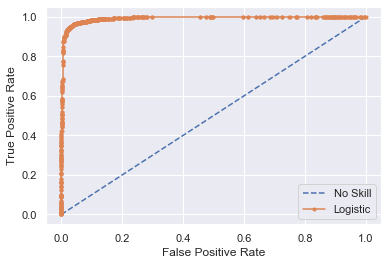

In [42]:
printStats(df_test["y_pred"], df_test["y_label"])
plotROC(df_test["y_pred"], df_test["y_label"])

# Q3: Model Results and prediction of unengaged users
## Using the above model, with Accuracy of 96% we could classify whether as of today the customer is engaged or not

# Defining states of user engagement and identifying early stages of customer churn

## Stages are:
## Customer activation -> Engagement -> Decline is user activity and unengagement -> reactivation
1. How would you set up a test/experiment to check whether we are actually reducing churn?
  * We shall monitor customer engagement index and flag unengaged users for communication via PN to keep them engaged. 
2. What metrics and techniques would you use to assess the impact of the business action?
  * Step 1 would be to identify unengaged users and setup an A/B framework to observe customer retention for observation period of 7 days along with their engagement index.
  * During the observation period we will monitor reactivation rate and lift in customer engagement index.


### For better understanding and improvement in of customer lifetime journey

1. Map users to demographic segments
2. Identify lifestage of customer in the app
3. Calculate his customer engagement index
4. Keep customer posten with PUSH Notification and CRM campaign
5. Using ML algorithm identify best channel and communication time of day for each user.
6. Using Propensity modelling identify best time of day and channel of communication.
7. Using customer journey mapping and customer lifestage status, identify customer events that lift customer journey from semi-engaged to highly engaged.